In [ ]:
import pandas as pd
from itertools import product
import crop_dataset_columns as cols
import matplotlib.pyplot as plt

url = '/home/nikolastojiljkovic/Podaci/fakultet/ML/Project 1/crops/data_core.csv'

dataframe_crops = pd.read_csv(url)




print('Crops dataframe dimension is ' + str(dataframe_crops.shape))
dataframe_crops.head(5)

Crops dataframe dimension is (8000, 9)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [ ]:
dataframe_crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [ ]:
duplicates = list(filter(lambda x : x == True, dataframe_crops.duplicated()))
print(f'Number of duplicates is {len(duplicates)}')


dataframe_crops.groupby([cols.CROP_TYPE_COLUMN, cols.FERTILIZER_NAME_COLUMN]).count()

negatives = dataframe_crops[dataframe_crops['Potassium'] < 0]

Number of duplicates is 0


In [ ]:
matrix = dataframe_crops.select_dtypes(include='number').corr()

print(matrix)

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.031322     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.005695     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.023618     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.445762    -0.635694
Potassium      -0.031322  0.005695  0.023618 -0.445762   1.000000     0.056225
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.056225     1.000000


In [ ]:
dataframe_crops[cols.FERTILIZER_NAME_COLUMN] = dataframe_crops[cols.FERTILIZER_NAME_COLUMN].astype(str).map(cols.fertilizer_groupation)
dataframe_crops.head(5)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Nitrogenous
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,Phosphatic
2,34.0,65.0,62.0,Black,Cotton,7,9,30,NPK Complex
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,High-N/P
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Nitrogenous


We can see that we have 7 classes and for each of them we have over 1000 examples. This means that we can group our classification results in less than 7 to make our model more exact in prediction.

In [ ]:
# Check duplicates
print(list(filter(lambda x: x is not False, dataframe_crops.duplicated())))

[]


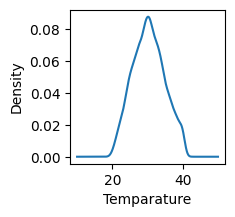

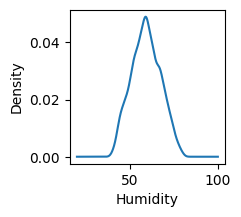

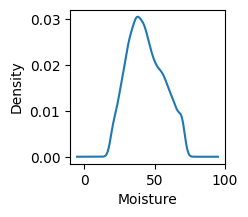

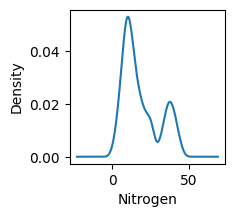

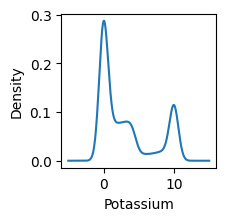

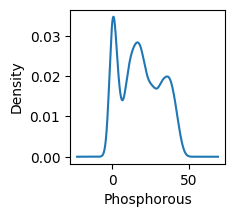

In [ ]:
import pandas.api.types as ptypes

# create dataframe out of any column
dataframes_per_column: list[pd.DataFrame] = []
a = cols.column_list
for column in cols.column_list:
    dataframes_per_column.append(dataframe_crops[column])
    
for df, column in zip(dataframes_per_column, cols.column_list):
    if ptypes.is_numeric_dtype(df.dtype):  
        plt.figure(figsize=(2,2))
        
        df.plot(kind='density')
        plt.xlabel(column)
    




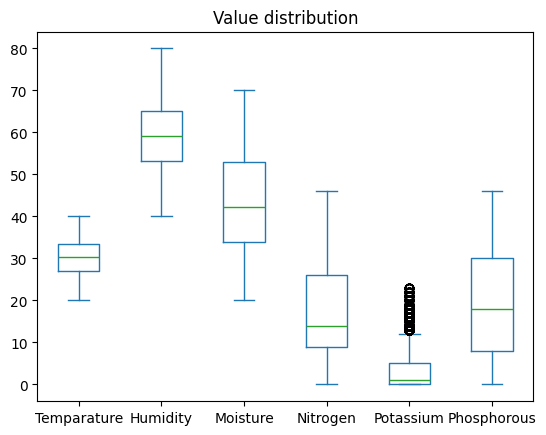

In [ ]:
dataframe_crops.plot(kind="box", title="Value distribution")
plt.show()

Here we can see that on Potassium column we have outlier values. This means that we should manage them before scaling values.

10.0


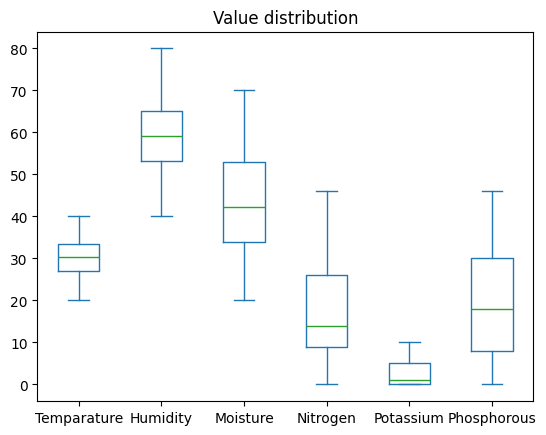

In [ ]:
# Calculating IQR value
quantile_q1 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.25)
quantile_q2 = dataframe_crops[cols.POTASSIUM_COLUMN].quantile(0.75)
iqr = quantile_q2 - quantile_q1

quantile_top_margin_value = quantile_q2 + iqr
print(quantile_top_margin_value)
# assign top margin value for outlier columns
dataframe_crops[cols.POTASSIUM_COLUMN].mask(dataframe_crops[cols.POTASSIUM_COLUMN] > quantile_top_margin_value, quantile_top_margin_value, inplace = True)

dataframe_crops.plot(kind="box", title="Value distribution")
plt.show()

We have performed outlier handling by assigning limit value in outlier value places. Now we can perform balancing of unbalanced data.

In [ ]:
matrix = dataframe_crops.select_dtypes(include='number').corr()

print(matrix)

             Temparature  Humidity  Moisture  Nitrogen  Potassium  Phosphorous
Temparature     1.000000  0.525594  0.067963 -0.028978  -0.012350     0.166951
Humidity        0.525594  1.000000  0.066713 -0.042701   0.019225     0.136216
Moisture        0.067963  0.066713  1.000000 -0.085016   0.052445     0.011854
Nitrogen       -0.028978 -0.042701 -0.085016  1.000000  -0.466244    -0.635694
Potassium      -0.012350  0.019225  0.052445 -0.466244   1.000000     0.103984
Phosphorous     0.166951  0.136216  0.011854 -0.635694   0.103984     1.000000


In [ ]:
from balancer import balance_SMOTENC

feature_column_list = list(filter(lambda column: column != cols.FERTILIZER_NAME_COLUMN, cols.column_list))
target_column = cols.FERTILIZER_NAME_COLUMN
# dataframe_crops = balance_SMOTENC(df = dataframe_crops, feature_columns = cols.column_list, target_column = target_column)

df_npk = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.NPK_COMPLEX]
df_high_np = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.HIGH_NP]
df_nitrogenous = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.NITROGENOUS]
df_phosphatic = dataframe_crops[dataframe_crops[cols.FERTILIZER_NAME_COLUMN] == cols.PHOSPHATIC]



# df_npk = dataframe_crops[cols.]

